# Adult Dataset Project

In [1]:
import data_loader as dl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
train_df, valid_df = dl.load_train_data("adult.data")

In [2]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'martial.status',
                   'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
                   'hours.per.week', 'native.country', 'income']
train_df.columns = column_names
train_df.head(5)

,age,workclass,fnlwgt,education,education.num,martial.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
24337,62,Local-gov,68268,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
17049,50,Private,215990,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
21016,36,Private,185405,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K
2790,64,Private,258006,Some-college,10,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,40,Cuba,<=50K
13511,28,Self-emp-not-inc,39388,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K


In [3]:
train_df.replace(' ?', np.nan, inplace=True)
train_df.isna().sum()

age                  0
workclass         1662
fnlwgt               0
education            0
education.num        0
martial.status       0
occupation        1669
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     498
income               0
dtype: int64

In [4]:
train_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
martial.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [5]:
train_df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,martial.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,29315.000000,27653,2.931500e+04,29315,29315.000000,29315,27646,29315,29315,29315,29315.000000,29315.000000,29315.000000,28817,29315
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,20424,NaN,9516,NaN,13469,3714,11853,25039,19604,NaN,NaN,NaN,26277,22229
mean,38.590756,NaN,1.894121e+05,NaN,10.071295,NaN,NaN,NaN,NaN,NaN,1094.195941,87.954801,40.443084,NaN,NaN
std,13.634218,NaN,1.057128e+05,NaN,2.576820,NaN,NaN,NaN,NaN,NaN,7458.664789,404.127059,12.311993,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175685e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.779550e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.368395e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [6]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode.fit(train_df)
imp_train_df = imp_mode.transform(train_df)
train_df = pd.DataFrame(imp_train_df, columns = column_names)

for col in ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']:
    train_df[col] = train_df[col].astype('int64')
train_df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,martial.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,29315.000000,29315,2.931500e+04,29315,29315.000000,29315,29315,29315,29315,29315,29315.000000,29315.000000,29315.000000,29315,29315
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22086,NaN,9516,NaN,13469,5383,11853,25039,19604,NaN,NaN,NaN,26775,22229
mean,38.590756,NaN,1.894121e+05,NaN,10.071295,NaN,NaN,NaN,NaN,NaN,1094.195941,87.954801,40.443084,NaN,NaN
std,13.634218,NaN,1.057128e+05,NaN,2.576820,NaN,NaN,NaN,NaN,NaN,7458.664789,404.127059,12.311993,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175685e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.779550e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.368395e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [7]:
# dict(enumerate(train_df['income'].cat.categories))
for col in ['workclass', 'education', 'martial.status', 'occupation', 'relationship', 'race', 
            'sex', 'native.country', 'income']:
    train_df[col] = train_df[col].astype('category')

In [8]:
train_df['income.code'] = train_df.income.cat.codes
train_df['capital.gain.loss'] = train_df['capital.gain'] - train_df['capital.loss']
train_df.head(15)

,age,workclass,fnlwgt,education,education.num,martial.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income.code,capital.gain.loss
0,62,Local-gov,68268,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K,0,0
1,50,Private,215990,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K,1,0
2,36,Private,185405,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K,1,0
3,64,Private,258006,Some-college,10,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,40,Cuba,<=50K,0,0
4,28,Self-emp-not-inc,39388,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K,0,0
5,19,Private,100790,HS-grad,9,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K,0,0
6,21,Private,60639,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,37,United-States,<=50K,0,0
7,39,Private,113481,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1,0
8,44,Local-gov,160943,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,<=50K,0,0
9,66,Private,214469,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,13,United-States,<=50K,0,0


In [9]:
train_df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,martial.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income.code,capital.gain.loss
count,29315.000000,29315,2.931500e+04,29315,29315.000000,29315,29315,29315,29315,29315,29315.000000,29315.000000,29315.000000,29315,29315,29315.000000,29315.000000
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2,NaN,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K,NaN,NaN
freq,NaN,22086,NaN,9516,NaN,13469,5383,11853,25039,19604,NaN,NaN,NaN,26775,22229,NaN,NaN
mean,38.590756,NaN,1.894121e+05,NaN,10.071295,NaN,NaN,NaN,NaN,NaN,1094.195941,87.954801,40.443084,NaN,NaN,0.241719,1006.241139
std,13.634218,NaN,1.057128e+05,NaN,2.576820,NaN,NaN,NaN,NaN,NaN,7458.664789,404.127059,12.311993,NaN,NaN,0.428132,7482.478550
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,0.000000,-4356.000000
25%,28.000000,NaN,1.175685e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,0.000000,0.000000
50%,37.000000,NaN,1.779550e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,0.000000,0.000000
75%,48.000000,NaN,2.368395e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN,0.000000,0.000000


In [10]:
num_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income.code', 'capital.gain.loss']
cat_features = ['workclass', 'education', 'martial.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']

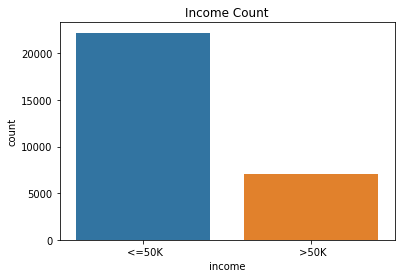

In [11]:
sns.countplot(train_df['income'])
plt.title("Income Count")
plt.show()

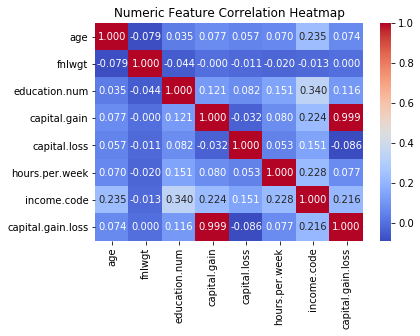

In [12]:
sns.heatmap(train_df[num_features].corr(), annot=True, fmt='.3f', cmap='coolwarm')
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

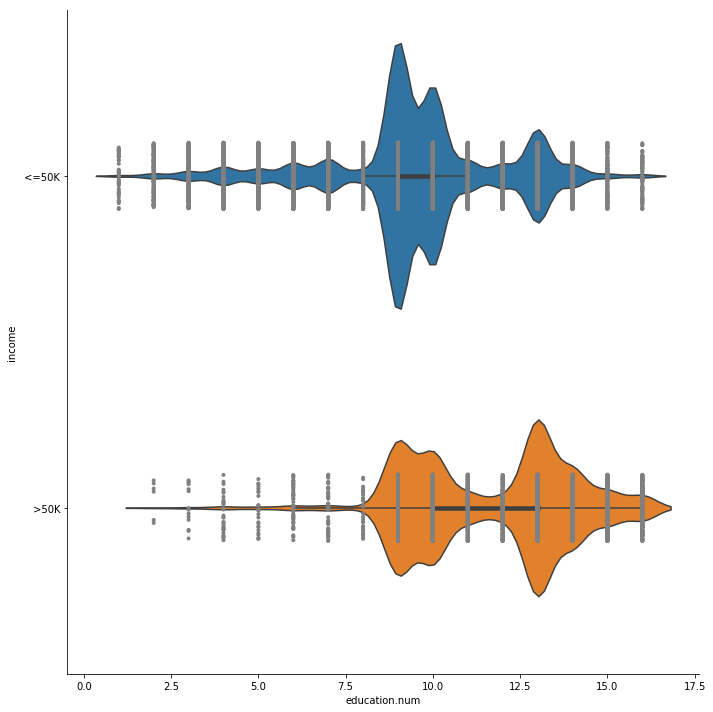

In [13]:
sns.catplot('education.num', 'income', data=train_df, kind="violin", height=10)
sns.stripplot(x="education.num", y="income", data=train_df, size=4, jitter=True, color="gray")
plt.show()

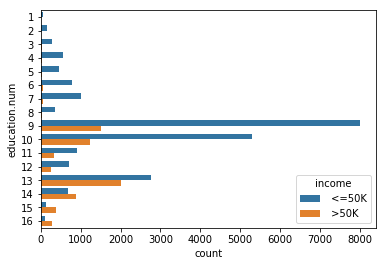

In [14]:
sns.countplot(y="education.num", hue="income", data=train_df)
plt.show()

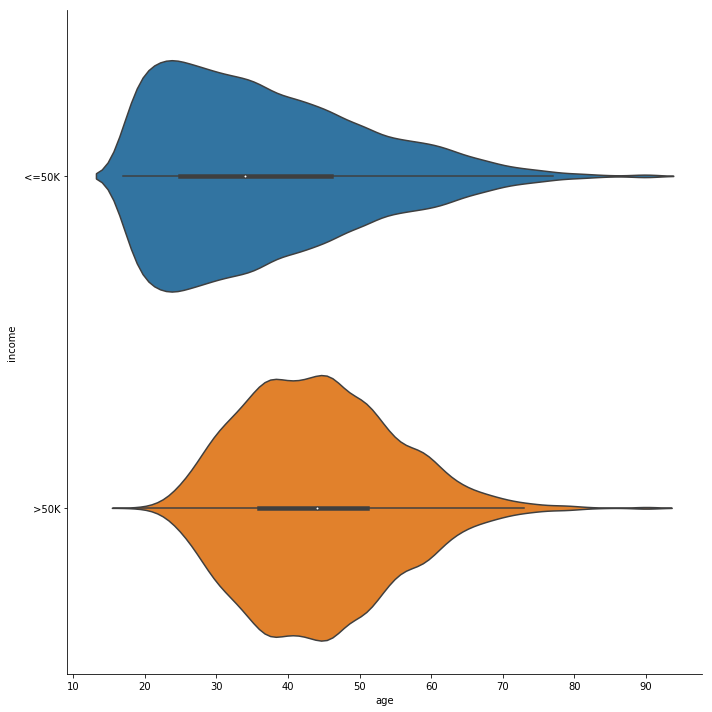

In [15]:
sns.catplot('age', 'income', data=train_df, kind="violin", inner="box", height=10)
plt.show()

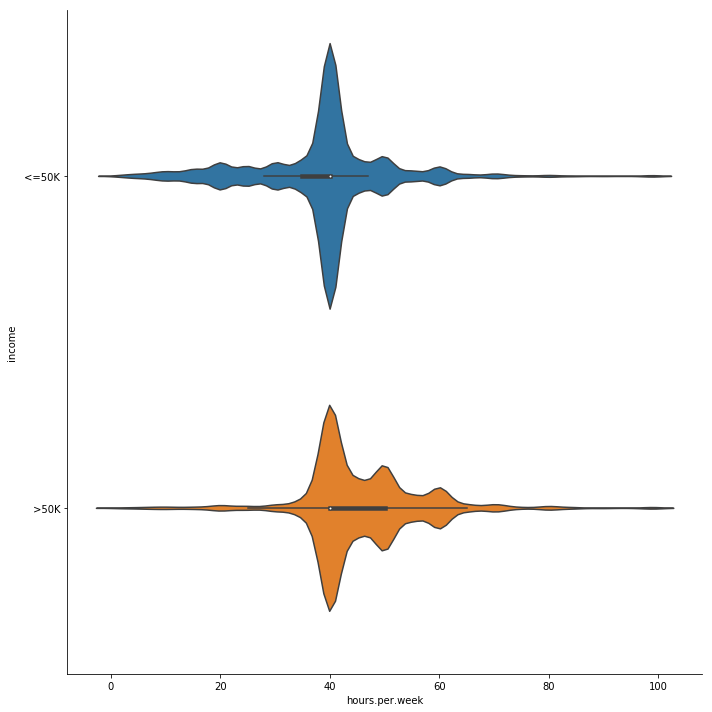

In [16]:
sns.catplot('hours.per.week', 'income', data=train_df, kind="violin", inner="box", height=10)
plt.show()

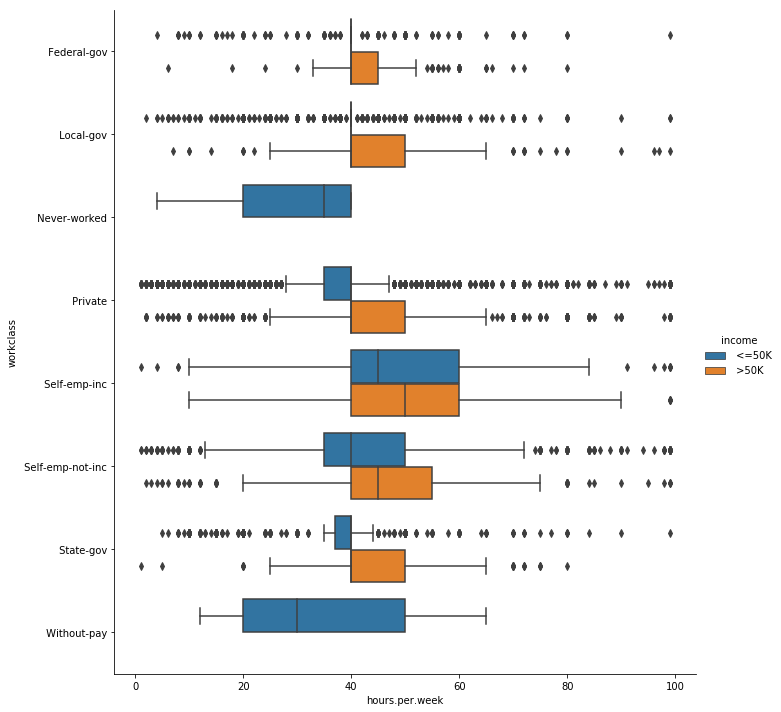

In [17]:
# g = sns.countplot(y="workclass", hue="income", data=train_df)
sns.catplot(x="hours.per.week", y="workclass", hue="income", data=train_df, kind="box", height=10)
plt.show()

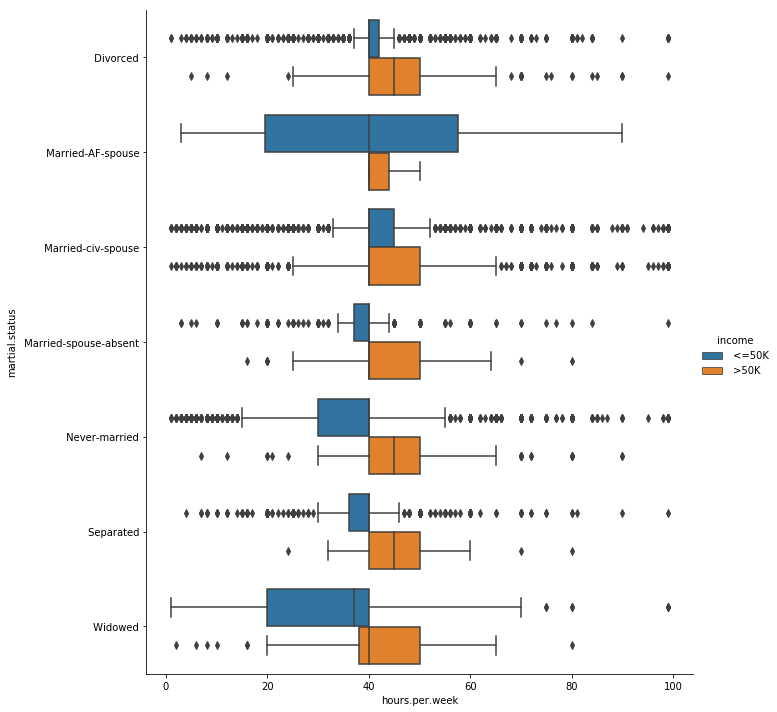

In [18]:
sns.catplot(x="hours.per.week", y="martial.status", hue="income", data=train_df, kind="box", height=10)
plt.show()

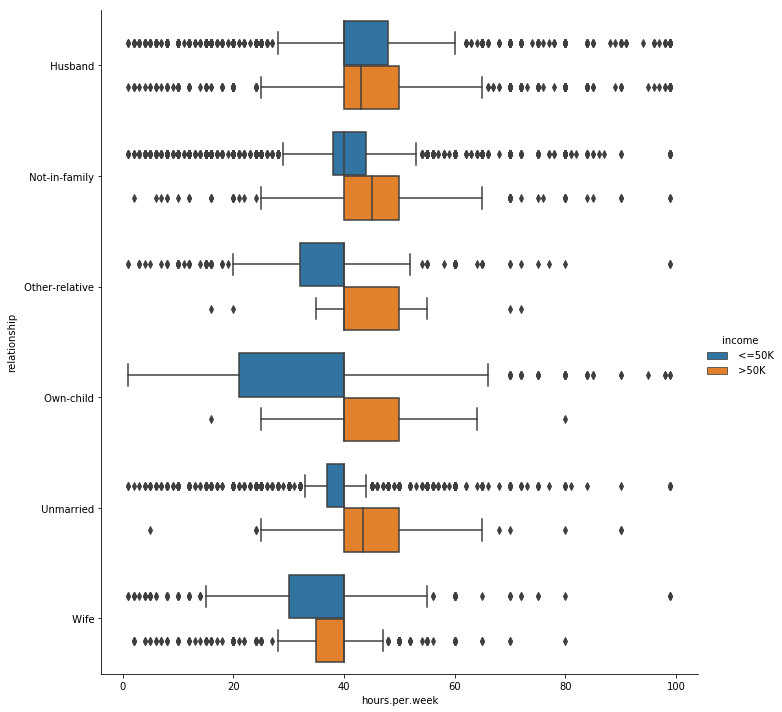

In [19]:
sns.catplot(x="hours.per.week", y="relationship", hue="income", data=train_df, kind="box", height=10)
plt.show()

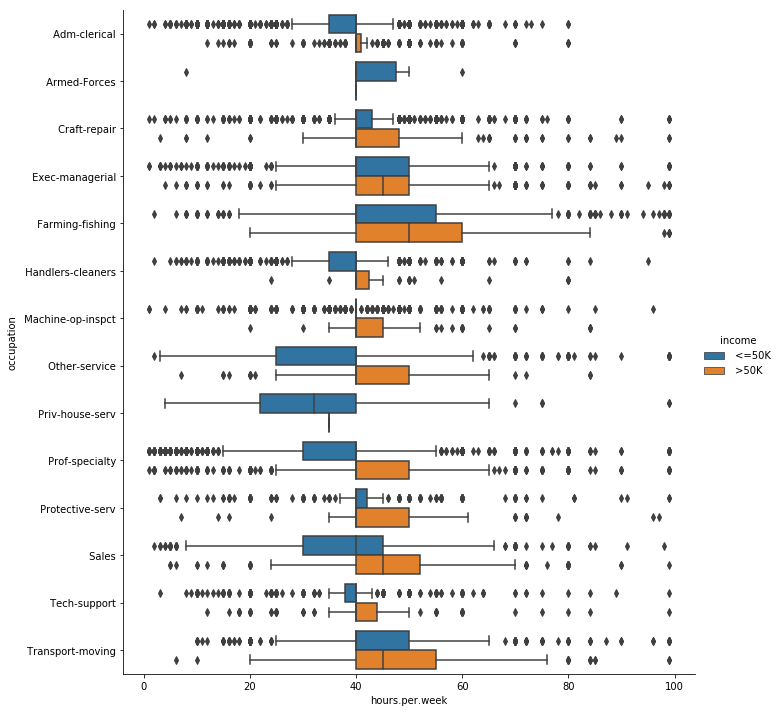

In [20]:
sns.catplot(x="hours.per.week", y="occupation", hue="income", data=train_df, kind="box", height=10)
plt.show()

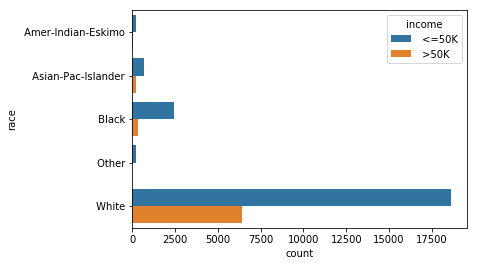

In [21]:
g = sns.countplot(y="race", hue="income", data=train_df)
plt.show()

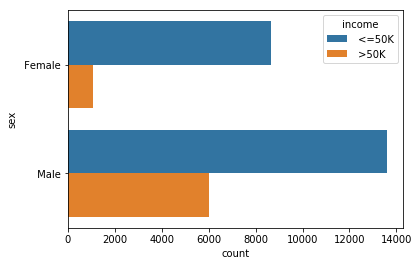

In [22]:
g = sns.countplot(y="sex", hue="income", data=train_df)
plt.show()

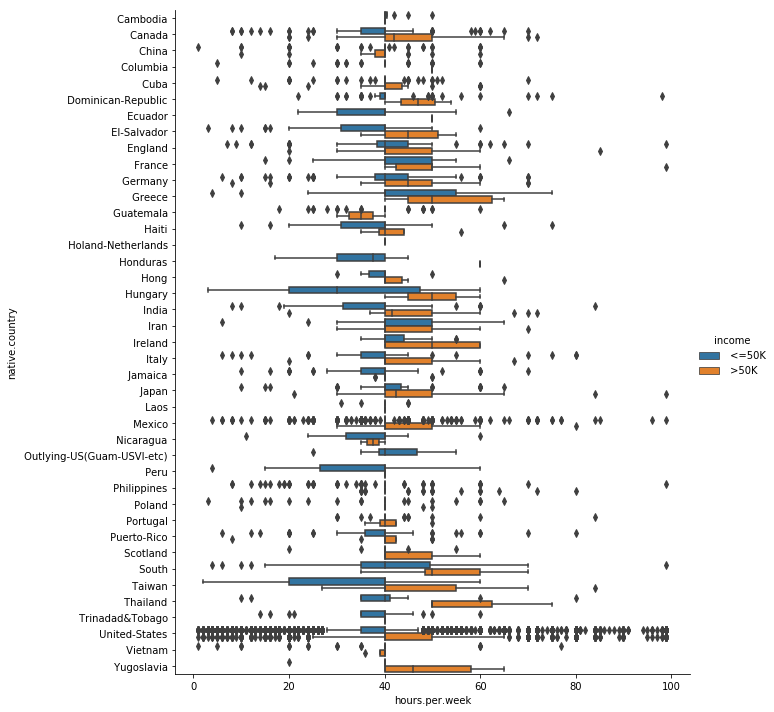

In [23]:
sns.catplot(x="hours.per.week", y="native.country", hue="income", data=train_df, kind="box", height=10)
plt.show()

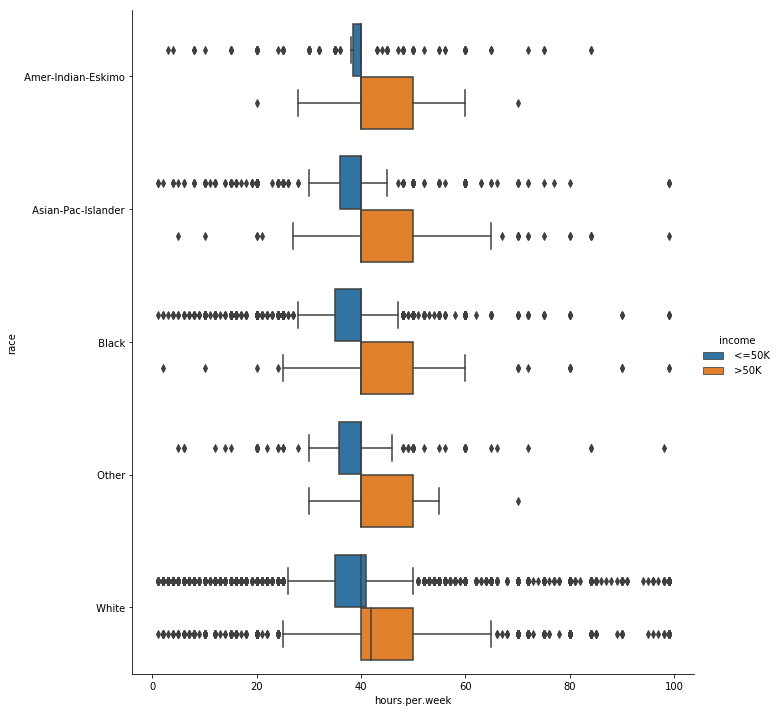

In [24]:
sns.catplot(x="hours.per.week", y="race", hue="income", data=train_df, kind="box", height=10)
plt.show()

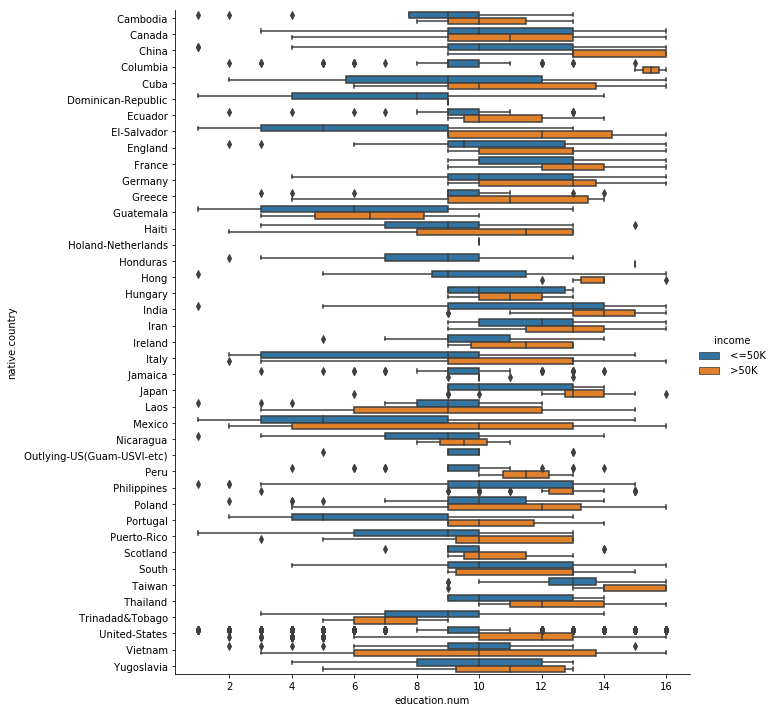

In [25]:
sns.catplot(x="education.num", y="native.country", hue="income", data=train_df, kind="box", height=10)
plt.show()

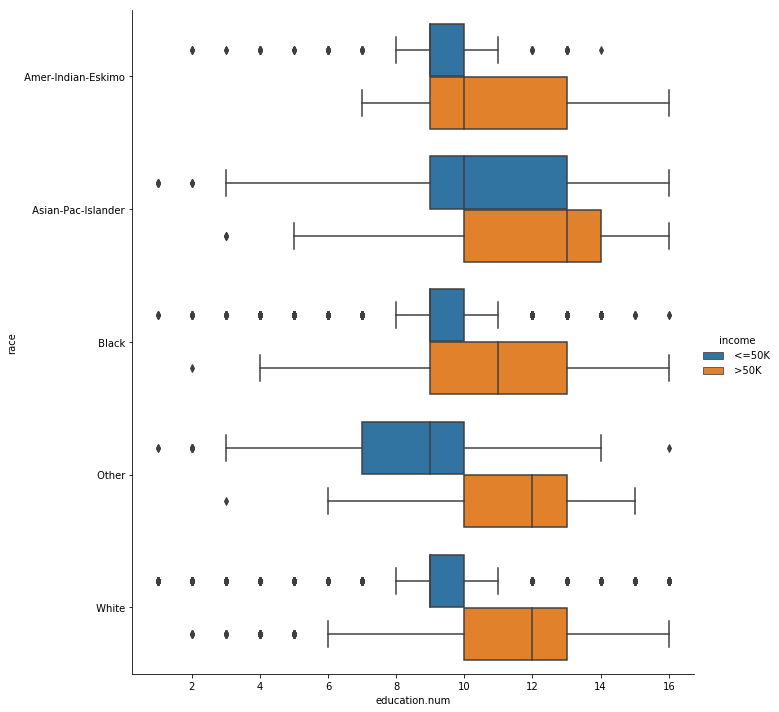

In [26]:
sns.catplot(x="education.num", y="race", hue="income", data=train_df, kind="box", height=10)
plt.show()

In [27]:
from scipy.stats import chi2_contingency
contingency = pd.crosstab(index=train_df['relationship'],columns=train_df['martial.status'])
chi2, p, dof, ex = chi2_contingency(contingency)
print(contingency)
print("Chi2: {} P: {} DOF: {}".format(chi2, p, dof))

martial.status    Divorced   Married-AF-spouse   Married-civ-spouse  \
relationship                                                          
 Husband                 0                   9                11844   
 Not-in-family        2179                   0                   17   
 Other-relative         95                   1                  113   
 Own-child             304                   0                   91   
 Unmarried            1436                   0                    0   
 Wife                    0                  10                 1404   

martial.status    Married-spouse-absent   Never-married   Separated   Widowed  
relationship                                                                   
 Husband                              0               0           0         0  
 Not-in-family                      189            4221         377       497  
 Other-relative                      31             542          50        45  
 Own-child                     

P-value is < 0.001 (represented as 0.0 by Scipy)   This shows that there is significant association between the columns of martial.status and relationship.